<a href="https://colab.research.google.com/github/highinaa/Sistem-Prediksi-Harga-Bahan-Pokok-/blob/main/Sistem_Prediksi_Harga_Bahan_Pokok.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import datetime as dt
from statsmodels.tsa.stattools import adfuller
from pandas.plotting import lag_plot
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose

**Import Data**


In [ ]:
#Data Harian
data = pd.read_excel("/content/Harga Bahan Pokok Komoditas Pangan 2020 - 2022.xlsx",sheet_name='HARIAN')

**cek tipe data, bentuk data**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1093 entries, 0 to 1092
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Tanggal             1093 non-null   datetime64[ns]
 1   Beras (Kg)          1093 non-null   int64         
 2   Gula Pasir (Kg)     1093 non-null   int64         
 3   Minyak Goreng (Lt)  1093 non-null   int64         
 4   Tepung Terigu (Kg)  1093 non-null   int64         
 5   Daging Sapi (Kg)    1093 non-null   int64         
 6   Daging Ayam (Kg)    1093 non-null   int64         
 7   Telur Ayam (Kg)     1093 non-null   int64         
 8   Cabe Merah  (Kg)    1093 non-null   int64         
 9   Bawang Merah (Kg)   1093 non-null   int64         
 10  Bawang Putih (Kg)   1093 non-null   int64         
dtypes: datetime64[ns](1), int64(10)
memory usage: 94.1 KB


**cek missing value**

In [ ]:
data.isnull().sum()

Tanggal               0
Beras (Kg)            0
Gula Pasir (Kg)       0
Minyak Goreng (Lt)    0
Tepung Terigu (Kg)    0
Daging Sapi (Kg)      0
Daging Ayam (Kg)      0
Telur Ayam (Kg)       0
Cabe Merah  (Kg)      0
Bawang Merah (Kg)     0
Bawang Putih (Kg)     0
dtype: int64

*Tidak terdapat missing value dalam data*

#EDA
Exploratory Data Analysis

`melihat pola data terhadap waktu`

In [ ]:
#Pengelompokan Jenis
Beras = ['Beras (Kg)']
Gula = ['Gula Pasir (Kg)']
Minyak = ['Minyak Goreng (Lt)']
Tepung = ['Tepung Terigu (Kg)']
Daging = ['Daging Sapi (Kg)', 'Telur Ayam (Kg)']
Cabe = ['Cabe Merah (Kg)']
Bawang = ['Bawang Merah (Kg)', 'Bawang Putih (Kg)']

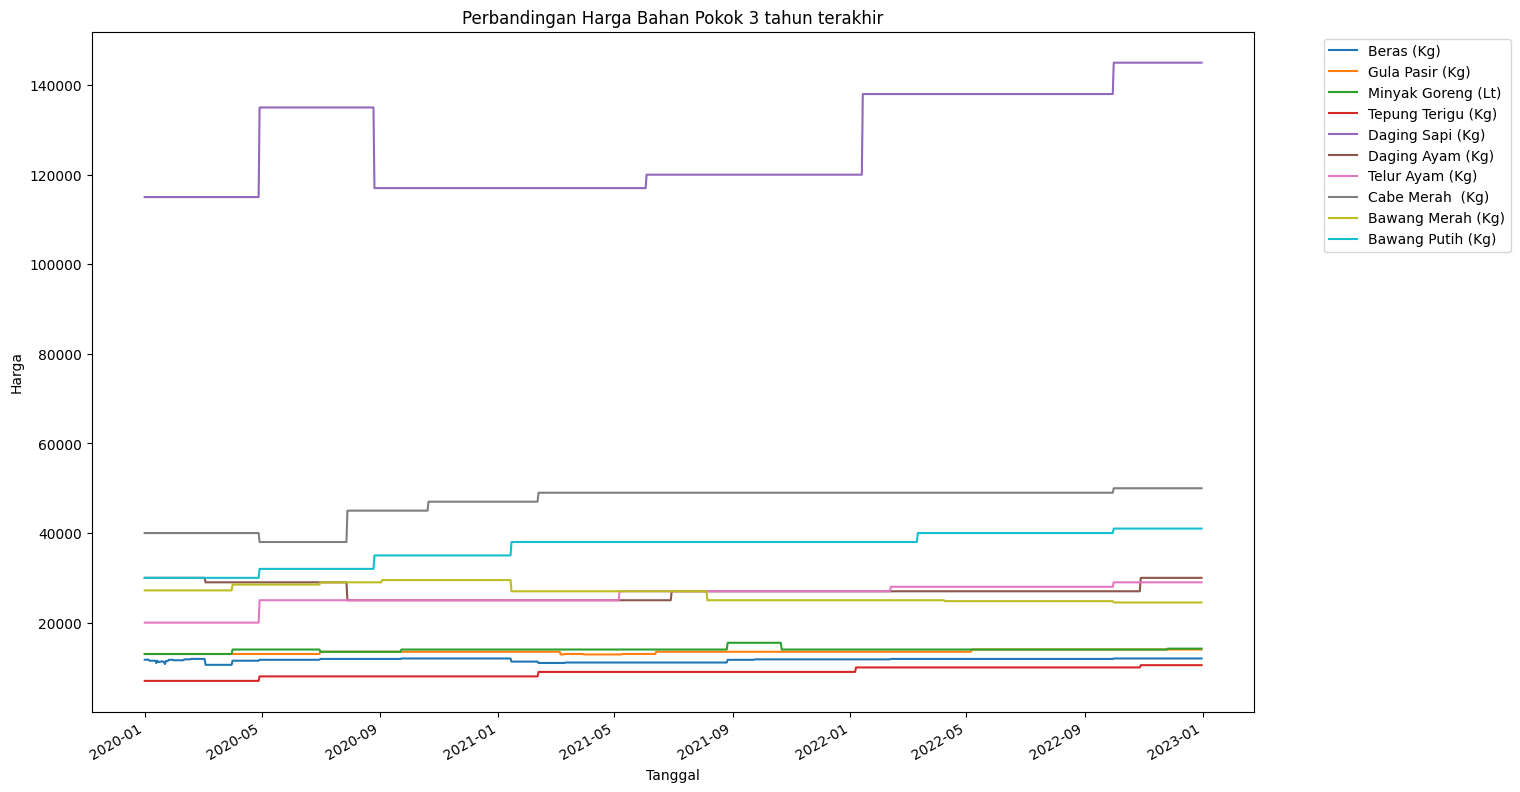

NameError: ignored

In [ ]:
#List Jenis
Kategori = [Beras,Gula,Minyak,Tepung,Daging,Cabe,Bawang]

"""NB : *yang dipakai hanya data harian* (sudah mewakili mingguan, bulanan)"""

df = data.copy()
df.index = pd.to_datetime(df['Tanggal'])
df.drop('Tanggal',axis=1,inplace = True)

df.plot(kind='line', figsize=(15, 10))
plt.legend(loc='upper center',bbox_to_anchor=(1.14, 1))
plt.title('Perbandingan Harga Bahan Pokok 3 tahun terakhir')
plt.ylabel('Harga')
plt.xlabel('Tanggal')
plt.show()

for i in Kategori:
  dataset.plot(kind='line', figsize=(16, 8))
  plt.legend(loc='upper center',bbox_to_anchor=(1.14, 1))
  plt.ylabel('Harga')
  plt.xlabel('Tanggal')
  plt.show()

"""`Selisih kenaikan harga bahan pokok` dari `2020-01-01` sampai `2022-12-31`"""

desc = df.describe().loc[['mean','min','max']].T.reset_index()
tgl = df.loc[['20200101','20221231'],:].T.reset_index()
diff = df.loc[['20200101','20221231'],:].diff().loc['20221231',:].reset_index(drop=True)
diff = pd.DataFrame(list(zip(diff.values.tolist())),columns =['Selisih'])


In [ ]:
#gabungkan data statistik deskriptif
stat_deskriptif = pd.concat([desc,tgl,diff],axis=1)
stat_deskriptif = stat_deskriptif.T.drop_duplicates().T

NameError: ignored

In [ ]:
#ubah nama variabel
old_var = stat_deskriptif.columns
new_var = ['Bahan Pokok', 'mean', 'min', 'max', '2020/01/01', '2022/12/31', 'Selisih']
stat_deskriptif.rename(columns=dict(zip(old_var, new_var)), inplace=True)

In [ ]:
#tambahkan persentase selisih
stat_deskriptif['Persentase Selisih (%)'] = stat_deskriptif['Selisih']/stat_deskriptif['2020/01/01']*100
stat_deskriptif

,Bahan Pokok,mean,min,max,2020/01/01,2022/12/31,Selisih,Persentase Selisih (%)
0,Beras (Kg),11668.968893,10580.0,12000.0,11725,12000,275.0,2.345416
1,Gula Pasir (Kg),13476.761208,12900.0,14000.0,13000,14000,1000.0,7.692308
2,Minyak Goreng (Lt),13961.756633,13000.0,15500.0,13000,14200,1200.0,9.230769
3,Tepung Terigu (Kg),8874.656908,7000.0,10500.0,7000,10500,3500.0,50.0
4,Daging Sapi (Kg),126684.354986,115000.0,145000.0,115000,145000,30000.0,26.086957
5,Daging Ayam (Kg),27002.744739,25000.0,30000.0,30000,30000,0.0,0.0
6,Telur Ayam (Kg),25934.126258,20000.0,29000.0,20000,29000,9000.0,45.0
7,Cabe Merah (Kg),46672.461116,38000.0,50000.0,40000,50000,10000.0,25.0
8,Bawang Merah (Kg),26558.005489,24500.0,29500.0,27200,24500,-2700.0,-9.926471
9,Bawang Putih (Kg),36708.142726,30000.0,41000.0,30000,41000,11000.0,36.666667


**cek autokorelasi**

In [ ]:
def autokorelasi(data):
  col = data.drop('Tanggal',axis=1).columns
  frame = []
  for i in col:
    nilai = data[i].autocorr()
    frame.append(nilai)
    print('variabel {} memiliki autokorelasi sebesar {}'.format(i,nilai))
    if nilai > 0:
      print('autokorelasi positif, mengikuti tren')
    else:
      None
    print('')
  print('')
  return pd.DataFrame(frame).plot(kind='line',title='Visualisasi Nilai Autokorelasi Data')

**Data harian**

autokorelasi(data)

NB : *semua bahan pokok dalam data harian,mengikuti trend*

<ipython-input-26-baaf0aeddf4f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.2f',ax=ax)


<Axes: >

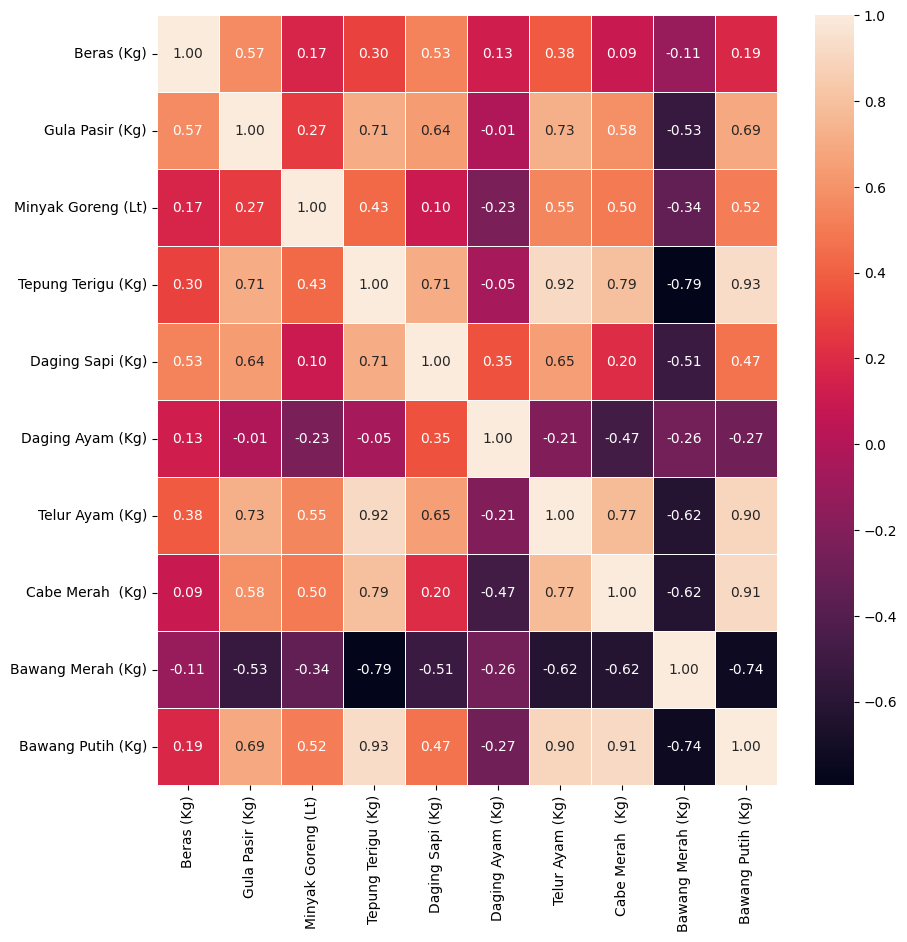

In [ ]:
f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.2f',ax=ax)

**cek stasioner**

In [ ]:
def test_stasioner(timeseries):
  stasioner = []
  nonstasioner = []
  for i in timeseries.columns:
    print("Hasil dickey fuller variabel {}".format(i))
    adft = adfuller(timeseries[i],autolag='AIC')
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])

    for key,values in adft[4].items():
        output['Nilai Kritis (%s)'%key] =  values
    print(output)
    print('')

    if output['p-value'] < 0.05:
      stasioner.append(i)
    else:
      nonstasioner.append(i)
  print('Stasioner = ',stasioner)
  print('Tidak Stasioner = ',nonstasioner)

#apply fungsi test_stasioner  
test_stasioner(df)

"""NB : *terbukti lebih banyak variabel data memiliki tren / tidak stasioner*

`maka Model ARMA, ARIMA, SARIMA tidak direkomendasikan`

Maka akan dilihat `pola trend, musiman bahan pokok dari data`
"""

In [ ]:
for i in df.columns:
  dataset = df[i]
  cycle, trend = sm.tsa.filters.hpfilter(dataset, 12)
  fig, ax = plt.subplots(1,3,figsize=(33,8))
  ax[0].plot(dataset)
  ax[0].set_title('Harga Bahan Pokok {}'.format(i))
  ax[1].plot(trend)
  ax[1].set_title('Trend Harga Bahan Pokok {}'.format(i))
  ax[2].plot(cycle)
  ax[2].set_title('Siklus Harga Bahan Pokok {}'.format(i))
  print('\n \n')
  plt.show()

**Data Preprocessing**

#Data Preprocessing

`Train Test Split`


In [ ]:
train_data, test_data = df[0 : int(len(df) * 0.8)], df[int(len(df) * 0.8) :]

print('bentuk data train = ',train_data.shape)
print('bentuk data test = ',test_data.shape)

bentuk data train =  (874, 10)
bentuk data test =  (219, 10)


**Model LSTM**

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout, LSTM
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV

In [ ]:
#deskripsi bentuk data train,test
def ekstrak_window_data(dataset, window_len=5, zero_base=True):
    window_data = []
    for i in range(len(dataset) - window_len):
        tmp = dataset[i: (i + window_len)].copy()
        window_data.append(tmp.values)
    return np.array(window_data)

In [ ]:
#membentuk data baru kriteria LSTM
def prepare_data(dataset, aim, window_len=10, zero_base=True, test_size=0.2):
    X_train = ekstrak_window_data(train_data, window_len, zero_base)
    X_test = ekstrak_window_data(test_data, window_len, zero_base)
    y_train = train_data[aim][window_len:].values
    y_test = test_data[aim][window_len:].values
    if zero_base:
        y_train = y_train / train_data[aim][:-window_len].values - 1
        y_test = y_test / test_data[aim][:-window_len].values - 1
    return train_data, test_data, X_train, X_test, y_train, y_test


In [ ]:
#membangun model LSTM
def build_model(optimizer):
    grid_model = Sequential()
    grid_model.add(LSTM(50,return_sequences=True,input_shape=(10,16)))
    grid_model.add(LSTM(50))
    grid_model.add(Dropout(0.2))
    grid_model.add(Dense(1))
    grid_model.compile(loss = 'mse',optimizer = optimizer, metrics=['accuracy'])
    return grid_model

In [ ]:
#parameter tuning
aim = df.columns
window_len = 10
test_size = 0.2
zero_base = True
loss = 'mse'
dropout = 0.2

In [ ]:
#run model LSTM
output = []
for i in aim:
  dict1 = {}
  train_data, test_data, X_train, X_test, y_train, y_test = prepare_data(
                                                            df, aim = i, window_len=window_len, zero_base=zero_base, test_size=test_size)

  grid_model = KerasRegressor(build_fn=build_model,verbose=1,validation_data=(X_test,y_test))
  parameters = {'batch_size' : [16,32],
              'epochs' : [100,50],
              'optimizer' : ['adam'] }
  grid_search  = GridSearchCV(estimator = grid_model,
                            param_grid = parameters, cv = 2)
  output.append(dict1)

param = pd.DataFrame(output)
param

def model_lstm(input_data, output_size, neurons, activ_func='linear', dropout=0.2, loss='mse', optimizer='adam'):
    model = Sequential()
    model.add(LSTM(neurons, input_shape=(input_data.shape[1], input_data.shape[2])))
    model.add(Dropout(dropout))
    model.add(Dense(units=output_size))
    model.add(Activation(activ_func))
    model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])
    return model

<ipython-input-37-bce3a639b3f9>:8: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  grid_model = KerasRegressor(build_fn=build_model,verbose=1,validation_data=(X_test,y_test))


data (df) tanpa scalling



In [ ]:
#parameter tuning
aim = df.columns
window_len = 10
test_size = 0.2
zero_base = True
lstm_neurons = 50
epochs = 100
batch_size = 16
loss = 'mse'
dropout = 0.24
optimizer = 'ghina'

NameError: ignored

Epoch 1/100
54/54 [==============================] - 8s 21ms/step - loss: 0.2594 - accuracy: 0.5243 - val_loss: 0.0249 - val_accuracy: 0.9522
Epoch 2/100
54/54 [==============================] - 1s 9ms/step - loss: 0.0987 - accuracy: 0.7616 - val_loss: 0.0023 - val_accuracy: 0.9522
Epoch 3/100
54/54 [==============================] - 0s 9ms/step - loss: 0.0842 - accuracy: 0.7720 - val_loss: 8.9510e-04 - val_accuracy: 0.9522
Epoch 4/100
54/54 [==============================] - 0s 9ms/step - loss: 0.0785 - accuracy: 0.7836 - val_loss: 4.0114e-04 - val_accuracy: 0.9522
Epoch 5/100
54/54 [==============================] - 1s 10ms/step - loss: 0.0697 - accuracy: 0.7859 - val_loss: 5.9260e-05 - val_accuracy: 0.9522
Epoch 6/100
54/54 [==============================] - 0s 8ms/step - loss: 0.0579 - accuracy: 0.7975 - val_loss: 3.9761e-04 - val_accuracy: 0.9522
Epoch 7/100
54/54 [==============================] - 0s 9ms/step - loss: 0.0487 - accuracy: 0.8044 - val_loss: 2.8896e-05 - val_accuracy

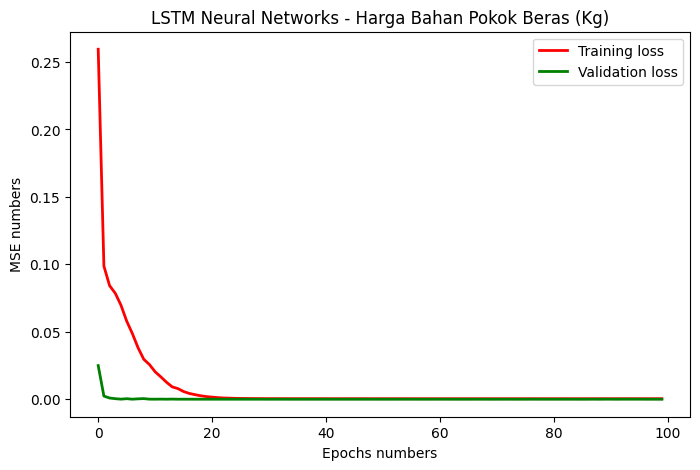

Epoch 1/100
54/54 [==============================] - 4s 20ms/step - loss: 0.1197 - accuracy: 0.8681 - val_loss: 0.0401 - val_accuracy: 1.0000
Epoch 2/100
54/54 [==============================] - 0s 9ms/step - loss: 0.0753 - accuracy: 0.8947 - val_loss: 0.0247 - val_accuracy: 1.0000
Epoch 3/100
54/54 [==============================] - 0s 9ms/step - loss: 0.0499 - accuracy: 0.9167 - val_loss: 0.0123 - val_accuracy: 1.0000
Epoch 4/100
54/54 [==============================] - 1s 12ms/step - loss: 0.0343 - accuracy: 0.9236 - val_loss: 0.0065 - val_accuracy: 1.0000
Epoch 5/100
54/54 [==============================] - 1s 11ms/step - loss: 0.0240 - accuracy: 0.9259 - val_loss: 0.0041 - val_accuracy: 1.0000
Epoch 6/100
54/54 [==============================] - 1s 11ms/step - loss: 0.0162 - accuracy: 0.9259 - val_loss: 0.0019 - val_accuracy: 1.0000
Epoch 7/100
54/54 [==============================] - 1s 11ms/step - loss: 0.0103 - accuracy: 0.9259 - val_loss: 9.4956e-04 - val_accuracy: 1.0000
Epoc

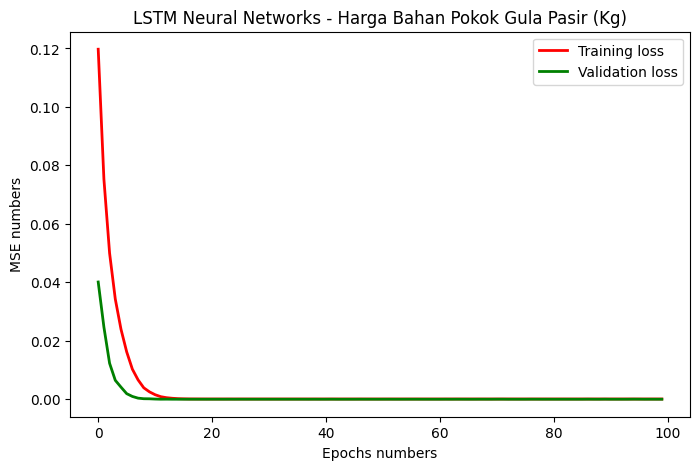

Epoch 1/100
54/54 [==============================] - 3s 17ms/step - loss: 0.0812 - accuracy: 0.9120 - val_loss: 2.6778e-04 - val_accuracy: 0.9522
Epoch 2/100
54/54 [==============================] - 0s 8ms/step - loss: 0.0602 - accuracy: 0.9294 - val_loss: 9.7288e-06 - val_accuracy: 0.9522
Epoch 3/100
54/54 [==============================] - 0s 7ms/step - loss: 0.0446 - accuracy: 0.9375 - val_loss: 8.1662e-05 - val_accuracy: 0.9522
Epoch 4/100
54/54 [==============================] - 0s 7ms/step - loss: 0.0270 - accuracy: 0.9421 - val_loss: 2.2124e-05 - val_accuracy: 0.9522
Epoch 5/100
54/54 [==============================] - 1s 10ms/step - loss: 0.0190 - accuracy: 0.9421 - val_loss: 4.0232e-04 - val_accuracy: 0.9522
Epoch 6/100
54/54 [==============================] - 1s 11ms/step - loss: 0.0139 - accuracy: 0.9421 - val_loss: 3.1409e-05 - val_accuracy: 0.9522
Epoch 7/100
54/54 [==============================] - 1s 10ms/step - loss: 0.0088 - accuracy: 0.9421 - val_loss: 1.7007e-05 - va

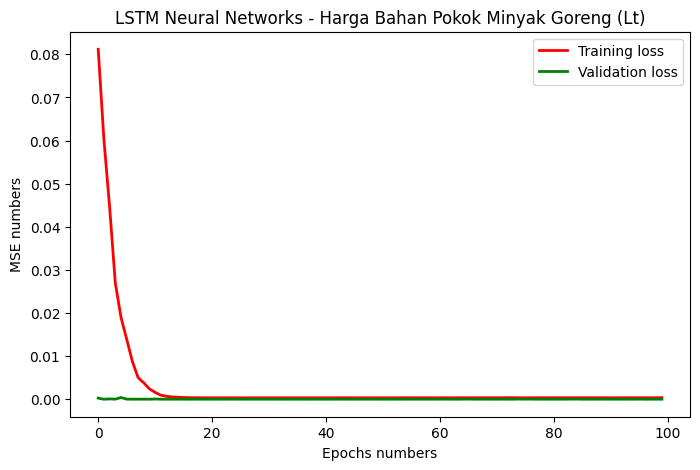

Epoch 1/100
54/54 [==============================] - 4s 19ms/step - loss: 0.3147 - accuracy: 0.5324 - val_loss: 0.1687 - val_accuracy: 0.9522
Epoch 2/100
54/54 [==============================] - 0s 8ms/step - loss: 0.1231 - accuracy: 0.8391 - val_loss: 0.0442 - val_accuracy: 0.9522
Epoch 3/100
54/54 [==============================] - 0s 8ms/step - loss: 0.0880 - accuracy: 0.9190 - val_loss: 0.0216 - val_accuracy: 0.9522
Epoch 4/100
54/54 [==============================] - 0s 8ms/step - loss: 0.0684 - accuracy: 0.9387 - val_loss: 0.0176 - val_accuracy: 0.9522
Epoch 5/100
54/54 [==============================] - 0s 8ms/step - loss: 0.0606 - accuracy: 0.9502 - val_loss: 0.0158 - val_accuracy: 0.9522
Epoch 6/100
54/54 [==============================] - 0s 9ms/step - loss: 0.0475 - accuracy: 0.9525 - val_loss: 0.0113 - val_accuracy: 0.9522
Epoch 7/100
54/54 [==============================] - 0s 8ms/step - loss: 0.0394 - accuracy: 0.9641 - val_loss: 0.0055 - val_accuracy: 0.9522
Epoch 8/100


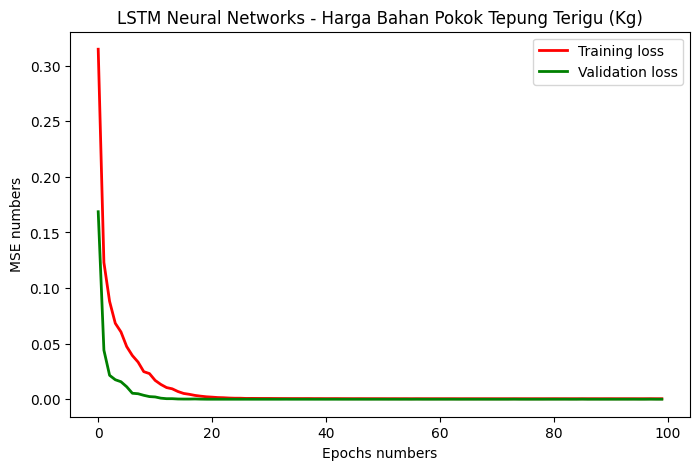

Epoch 1/100
54/54 [==============================] - 3s 19ms/step - loss: 0.1159 - accuracy: 0.9248 - val_loss: 5.1670e-04 - val_accuracy: 0.9522
Epoch 2/100
54/54 [==============================] - 0s 8ms/step - loss: 0.0687 - accuracy: 0.9248 - val_loss: 8.6715e-04 - val_accuracy: 0.9522
Epoch 3/100
54/54 [==============================] - 0s 8ms/step - loss: 0.0629 - accuracy: 0.9317 - val_loss: 4.1705e-04 - val_accuracy: 0.9522
Epoch 4/100
54/54 [==============================] - 0s 8ms/step - loss: 0.0507 - accuracy: 0.9410 - val_loss: 4.4159e-04 - val_accuracy: 0.9522
Epoch 5/100
54/54 [==============================] - 0s 8ms/step - loss: 0.0384 - accuracy: 0.9456 - val_loss: 7.1054e-04 - val_accuracy: 0.9522
Epoch 6/100
54/54 [==============================] - 0s 8ms/step - loss: 0.0323 - accuracy: 0.9514 - val_loss: 2.4246e-04 - val_accuracy: 0.9522
Epoch 7/100
54/54 [==============================] - 0s 8ms/step - loss: 0.0233 - accuracy: 0.9537 - val_loss: 2.5719e-04 - val_a

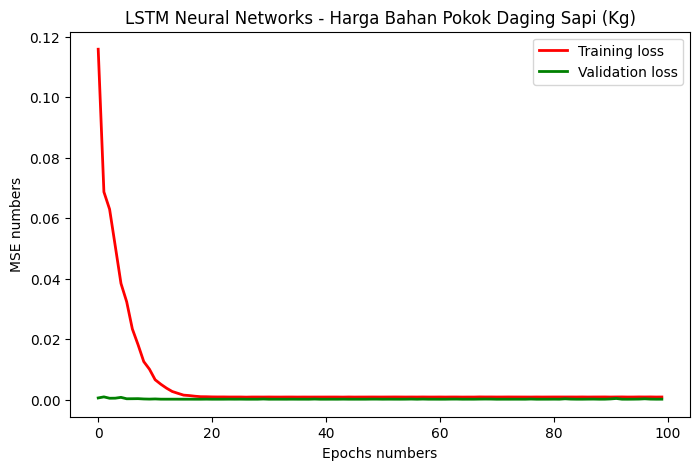

Epoch 1/100
54/54 [==============================] - 4s 19ms/step - loss: 0.1572 - accuracy: 0.8611 - val_loss: 0.0417 - val_accuracy: 0.9522
Epoch 2/100
54/54 [==============================] - 1s 10ms/step - loss: 0.1747 - accuracy: 0.8727 - val_loss: 0.0769 - val_accuracy: 0.9522
Epoch 3/100
54/54 [==============================] - 1s 10ms/step - loss: 0.1232 - accuracy: 0.8924 - val_loss: 0.0260 - val_accuracy: 0.9522
Epoch 4/100
54/54 [==============================] - 1s 12ms/step - loss: 0.0945 - accuracy: 0.9109 - val_loss: 0.0190 - val_accuracy: 0.9522
Epoch 5/100
54/54 [==============================] - 1s 13ms/step - loss: 0.0652 - accuracy: 0.9410 - val_loss: 0.0131 - val_accuracy: 0.9522
Epoch 6/100
54/54 [==============================] - 1s 11ms/step - loss: 0.0538 - accuracy: 0.9468 - val_loss: 0.0048 - val_accuracy: 0.9522
Epoch 7/100
54/54 [==============================] - 1s 11ms/step - loss: 0.0362 - accuracy: 0.9595 - val_loss: 0.0016 - val_accuracy: 0.9522
Epoch 

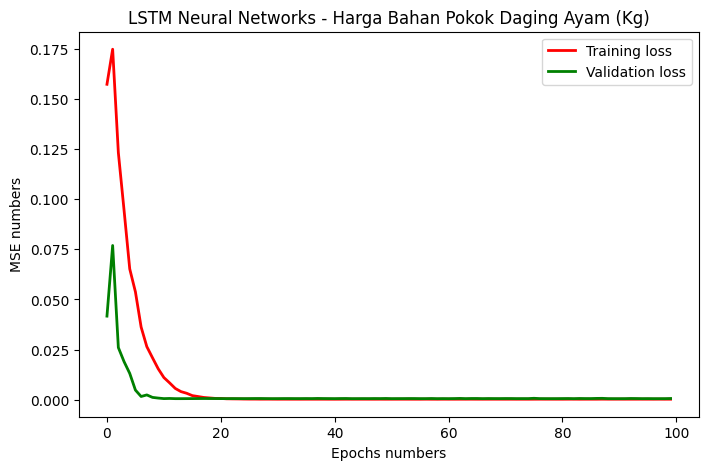

Epoch 1/100
54/54 [==============================] - 4s 30ms/step - loss: 0.1484 - accuracy: 0.9514 - val_loss: 9.5891e-05 - val_accuracy: 0.9522
Epoch 2/100
54/54 [==============================] - 1s 10ms/step - loss: 0.0939 - accuracy: 0.9271 - val_loss: 0.0035 - val_accuracy: 0.9522
Epoch 3/100
54/54 [==============================] - 1s 10ms/step - loss: 0.0732 - accuracy: 0.9444 - val_loss: 0.0017 - val_accuracy: 0.9522
Epoch 4/100
54/54 [==============================] - 1s 10ms/step - loss: 0.0613 - accuracy: 0.9421 - val_loss: 4.3597e-04 - val_accuracy: 0.9522
Epoch 5/100
54/54 [==============================] - 1s 10ms/step - loss: 0.0479 - accuracy: 0.9572 - val_loss: 6.8646e-04 - val_accuracy: 0.9522
Epoch 6/100
54/54 [==============================] - 1s 10ms/step - loss: 0.0387 - accuracy: 0.9606 - val_loss: 1.2988e-04 - val_accuracy: 0.9522
Epoch 7/100
54/54 [==============================] - 1s 9ms/step - loss: 0.0304 - accuracy: 0.9641 - val_loss: 6.1761e-05 - val_accu

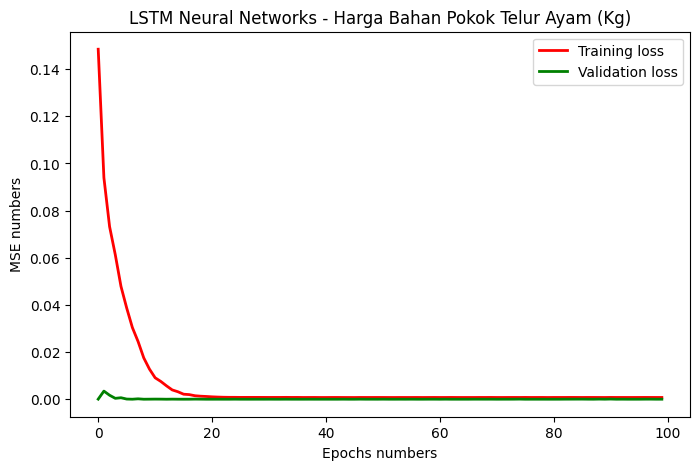

Epoch 1/100
54/54 [==============================] - 3s 19ms/step - loss: 0.1461 - accuracy: 0.8877 - val_loss: 1.0291e-04 - val_accuracy: 0.9522
Epoch 2/100
54/54 [==============================] - 0s 8ms/step - loss: 0.1225 - accuracy: 0.8843 - val_loss: 0.0011 - val_accuracy: 0.9522
Epoch 3/100
54/54 [==============================] - 0s 9ms/step - loss: 0.0847 - accuracy: 0.8981 - val_loss: 5.0878e-05 - val_accuracy: 0.9522
Epoch 4/100
54/54 [==============================] - 0s 9ms/step - loss: 0.0786 - accuracy: 0.9120 - val_loss: 2.3249e-05 - val_accuracy: 0.9522
Epoch 5/100
54/54 [==============================] - 0s 9ms/step - loss: 0.0550 - accuracy: 0.9387 - val_loss: 3.1614e-05 - val_accuracy: 0.9522
Epoch 6/100
54/54 [==============================] - 0s 9ms/step - loss: 0.0435 - accuracy: 0.9433 - val_loss: 2.5604e-04 - val_accuracy: 0.9522
Epoch 7/100
54/54 [==============================] - 0s 8ms/step - loss: 0.0339 - accuracy: 0.9525 - val_loss: 3.8743e-05 - val_accur

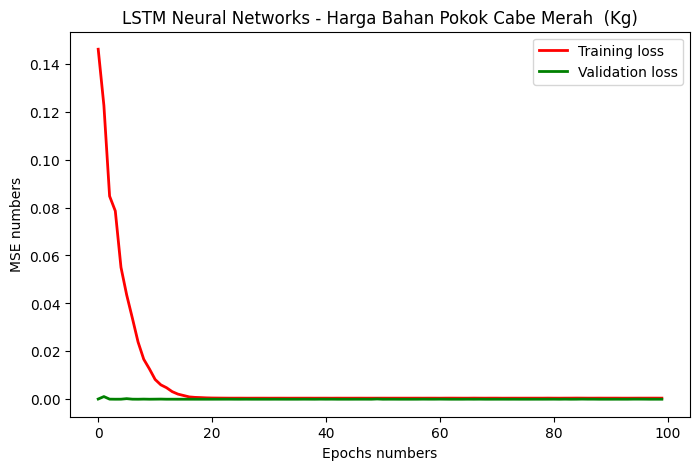

Epoch 1/100
54/54 [==============================] - 3s 21ms/step - loss: 0.1420 - accuracy: 0.8461 - val_loss: 0.0457 - val_accuracy: 0.9522
Epoch 2/100
54/54 [==============================] - 1s 10ms/step - loss: 0.0993 - accuracy: 0.8738 - val_loss: 0.0244 - val_accuracy: 0.9522
Epoch 3/100
54/54 [==============================] - 1s 9ms/step - loss: 0.0735 - accuracy: 0.8935 - val_loss: 0.0124 - val_accuracy: 0.9522
Epoch 4/100
54/54 [==============================] - 0s 9ms/step - loss: 0.0572 - accuracy: 0.9120 - val_loss: 0.0085 - val_accuracy: 0.9522
Epoch 5/100
54/54 [==============================] - 0s 9ms/step - loss: 0.0367 - accuracy: 0.9271 - val_loss: 0.0048 - val_accuracy: 0.9522
Epoch 6/100
54/54 [==============================] - 0s 8ms/step - loss: 0.0273 - accuracy: 0.9282 - val_loss: 0.0013 - val_accuracy: 0.9522
Epoch 7/100
54/54 [==============================] - 1s 10ms/step - loss: 0.0187 - accuracy: 0.9306 - val_loss: 9.0886e-04 - val_accuracy: 0.9522
Epoch 

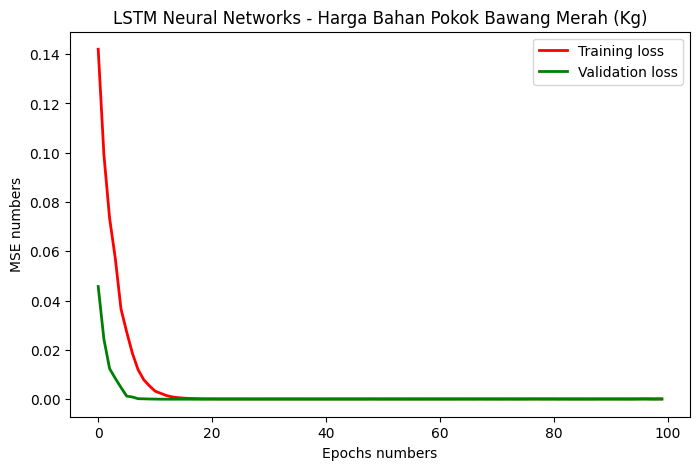

Epoch 1/100
54/54 [==============================] - 5s 23ms/step - loss: 0.2121 - accuracy: 0.7188 - val_loss: 2.7388e-04 - val_accuracy: 0.9522
Epoch 2/100
54/54 [==============================] - 1s 10ms/step - loss: 0.1098 - accuracy: 0.9039 - val_loss: 5.5279e-04 - val_accuracy: 0.9522
Epoch 3/100
54/54 [==============================] - 1s 10ms/step - loss: 0.0988 - accuracy: 0.8900 - val_loss: 2.9158e-05 - val_accuracy: 0.9522
Epoch 4/100
54/54 [==============================] - 1s 13ms/step - loss: 0.0766 - accuracy: 0.9144 - val_loss: 3.2095e-05 - val_accuracy: 0.9522
Epoch 5/100
54/54 [==============================] - 1s 12ms/step - loss: 0.0655 - accuracy: 0.9259 - val_loss: 4.4423e-05 - val_accuracy: 0.9522
Epoch 6/100
54/54 [==============================] - 1s 12ms/step - loss: 0.0588 - accuracy: 0.9410 - val_loss: 4.2166e-05 - val_accuracy: 0.9522
Epoch 7/100
54/54 [==============================] - 1s 13ms/step - loss: 0.0456 - accuracy: 0.9468 - val_loss: 4.3124e-04 -

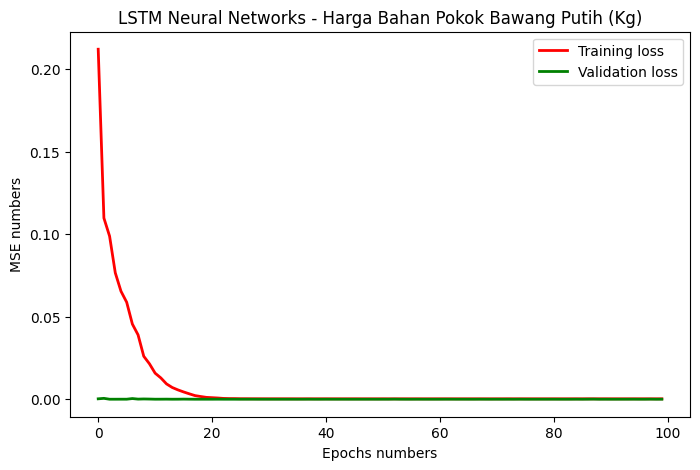

In [ ]:
#run model LSTM
MSE = []
MAPE = []
for i in aim:
  train_data, test_data, X_train, X_test, y_train, y_test = prepare_data(
                                                            df, aim = i, window_len=window_len, zero_base=zero_base, test_size=test_size)

  model = model_lstm(X_train, output_size=1, neurons=lstm_neurons, dropout=dropout, loss=loss, optimizer=optimizer)
  modelfit = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=batch_size, verbose=1, shuffle=True)
  #targets = test_data[i][window_len:]
  preds = model.predict(X_test).squeeze()
  MSE.append(mean_squared_error(preds, y_test))


  plt.figure(figsize=(8, 5))
  plt.plot(modelfit.history['loss'],'r',linewidth=2, label='Training loss')
  plt.plot(modelfit.history['val_loss'], 'g',linewidth=2, label='Validation loss')
  plt.title('LSTM Neural Networks - Harga Bahan Pokok {}'.format(i))
  plt.xlabel('Epochs numbers')
  plt.ylabel('MSE numbers')
  plt.legend()
  plt.show()

**data (df) dengan scalling**

In [ ]:
def normal_min_max(continuous):
    return (continuous - continuous.min()) / (df.max() - continuous.min())

df_minmax = normal_min_max(df)

Epoch 1/100
54/54 [==============================] - 5s 18ms/step - loss: 0.1116 - accuracy: 0.7755 - val_loss: 0.0019 - val_accuracy: 0.9522
Epoch 2/100
54/54 [==============================] - 0s 8ms/step - loss: 0.0849 - accuracy: 0.7963 - val_loss: 0.0022 - val_accuracy: 0.9522
Epoch 3/100
54/54 [==============================] - 0s 8ms/step - loss: 0.0618 - accuracy: 0.7998 - val_loss: 3.6521e-04 - val_accuracy: 0.9522
Epoch 4/100
54/54 [==============================] - 0s 7ms/step - loss: 0.0421 - accuracy: 0.8137 - val_loss: 2.3803e-04 - val_accuracy: 0.9522
Epoch 5/100
54/54 [==============================] - 0s 9ms/step - loss: 0.0318 - accuracy: 0.8160 - val_loss: 1.9501e-04 - val_accuracy: 0.9522
Epoch 6/100
54/54 [==============================] - 0s 7ms/step - loss: 0.0222 - accuracy: 0.8183 - val_loss: 9.3946e-05 - val_accuracy: 0.9522
Epoch 7/100
54/54 [==============================] - 0s 9ms/step - loss: 0.0156 - accuracy: 0.8183 - val_loss: 3.0122e-04 - val_accuracy:

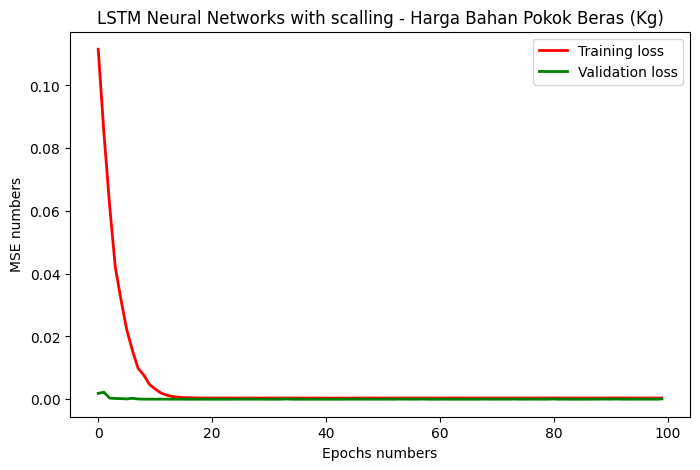

Epoch 1/100
54/54 [==============================] - 3s 20ms/step - loss: 0.4208 - accuracy: 0.4398 - val_loss: 0.2777 - val_accuracy: 0.0000e+00
Epoch 2/100
54/54 [==============================] - 1s 11ms/step - loss: 0.1071 - accuracy: 0.8183 - val_loss: 0.0724 - val_accuracy: 1.0000
Epoch 3/100
54/54 [==============================] - 1s 11ms/step - loss: 0.0662 - accuracy: 0.8947 - val_loss: 0.0319 - val_accuracy: 1.0000
Epoch 4/100
54/54 [==============================] - 1s 13ms/step - loss: 0.0573 - accuracy: 0.9062 - val_loss: 0.0260 - val_accuracy: 1.0000
Epoch 5/100
54/54 [==============================] - 1s 11ms/step - loss: 0.0513 - accuracy: 0.9109 - val_loss: 0.0158 - val_accuracy: 1.0000
Epoch 6/100
54/54 [==============================] - 0s 8ms/step - loss: 0.0457 - accuracy: 0.9109 - val_loss: 0.0134 - val_accuracy: 1.0000
Epoch 7/100
54/54 [==============================] - 0s 8ms/step - loss: 0.0400 - accuracy: 0.9190 - val_loss: 0.0131 - val_accuracy: 1.0000
Epoc

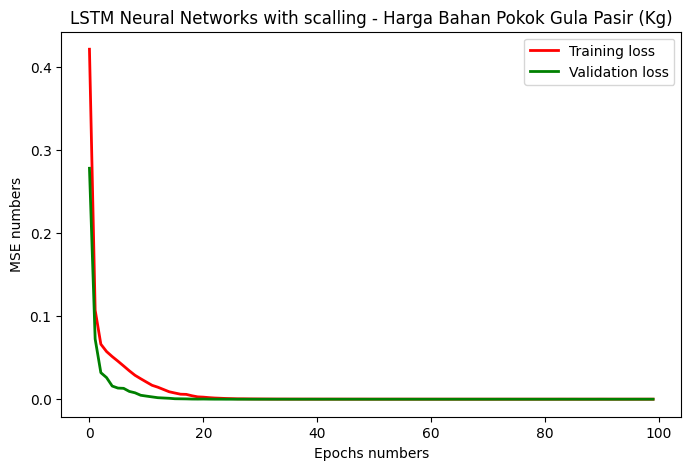

Epoch 1/100
54/54 [==============================] - 3s 20ms/step - loss: 0.1643 - accuracy: 0.8345 - val_loss: 0.0063 - val_accuracy: 0.9522
Epoch 2/100
54/54 [==============================] - 0s 8ms/step - loss: 0.1090 - accuracy: 0.8762 - val_loss: 0.0069 - val_accuracy: 0.9522
Epoch 3/100
54/54 [==============================] - 0s 8ms/step - loss: 0.0882 - accuracy: 0.9051 - val_loss: 0.0036 - val_accuracy: 0.9522
Epoch 4/100
54/54 [==============================] - 1s 10ms/step - loss: 0.0670 - accuracy: 0.9225 - val_loss: 0.0025 - val_accuracy: 0.9522
Epoch 5/100
54/54 [==============================] - 1s 11ms/step - loss: 0.0462 - accuracy: 0.9329 - val_loss: 0.0034 - val_accuracy: 0.9522
Epoch 6/100
54/54 [==============================] - 1s 11ms/step - loss: 0.0335 - accuracy: 0.9421 - val_loss: 0.0013 - val_accuracy: 0.9522
Epoch 7/100
54/54 [==============================] - 1s 11ms/step - loss: 0.0226 - accuracy: 0.9421 - val_loss: 0.0012 - val_accuracy: 0.9522
Epoch 8/

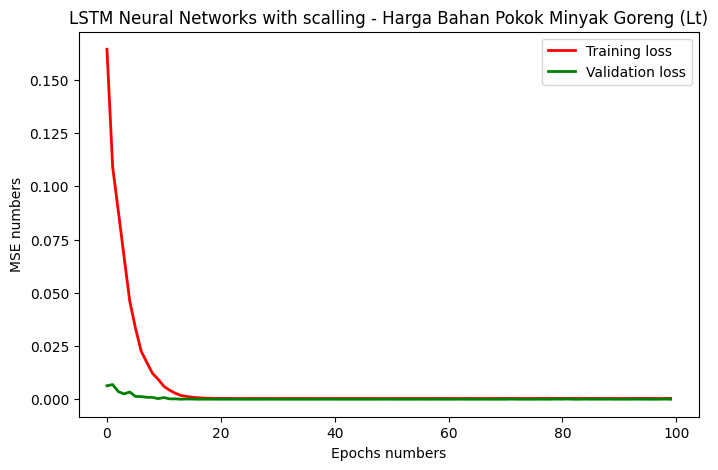

Epoch 1/100
54/54 [==============================] - 3s 20ms/step - loss: 1.2594 - accuracy: 0.9653 - val_loss: 0.3931 - val_accuracy: 0.9522
Epoch 2/100
54/54 [==============================] - 0s 9ms/step - loss: 0.3586 - accuracy: 0.9641 - val_loss: 0.0430 - val_accuracy: 0.9522
Epoch 3/100
54/54 [==============================] - 0s 9ms/step - loss: 0.1231 - accuracy: 0.9595 - val_loss: 5.9950e-04 - val_accuracy: 0.9522
Epoch 4/100
54/54 [==============================] - 0s 9ms/step - loss: 0.0693 - accuracy: 0.9444 - val_loss: 5.1128e-04 - val_accuracy: 0.9522
Epoch 5/100
54/54 [==============================] - 0s 9ms/step - loss: 0.0695 - accuracy: 0.9468 - val_loss: 0.0011 - val_accuracy: 0.9522
Epoch 6/100
54/54 [==============================] - 1s 10ms/step - loss: 0.0588 - accuracy: 0.9456 - val_loss: 2.9997e-04 - val_accuracy: 0.9522
Epoch 7/100
54/54 [==============================] - 1s 11ms/step - loss: 0.0505 - accuracy: 0.9572 - val_loss: 5.0201e-04 - val_accuracy: 0

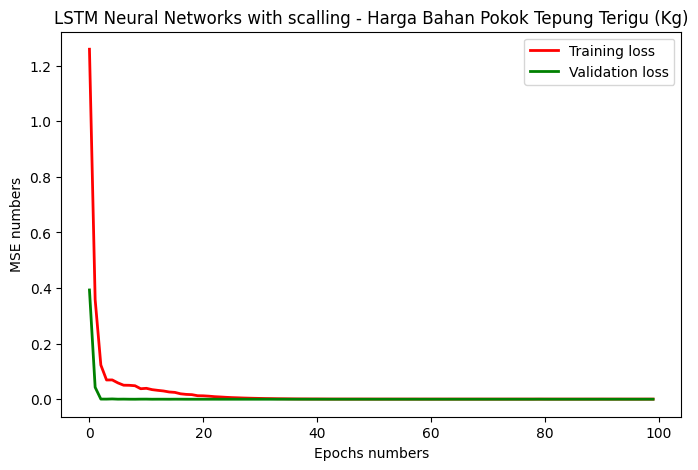

Epoch 1/100
54/54 [==============================] - 3s 25ms/step - loss: 0.1478 - accuracy: 0.8542 - val_loss: 0.0039 - val_accuracy: 0.9522
Epoch 2/100
54/54 [==============================] - 1s 11ms/step - loss: 0.1218 - accuracy: 0.8623 - val_loss: 3.7902e-04 - val_accuracy: 0.9522
Epoch 3/100
54/54 [==============================] - 1s 10ms/step - loss: 0.0859 - accuracy: 0.9132 - val_loss: 1.3956e-04 - val_accuracy: 0.9522
Epoch 4/100
54/54 [==============================] - 1s 13ms/step - loss: 0.0653 - accuracy: 0.9306 - val_loss: 0.0012 - val_accuracy: 0.9522
Epoch 5/100
54/54 [==============================] - 0s 9ms/step - loss: 0.0466 - accuracy: 0.9375 - val_loss: 0.0011 - val_accuracy: 0.9522
Epoch 6/100
54/54 [==============================] - 0s 8ms/step - loss: 0.0332 - accuracy: 0.9514 - val_loss: 0.0011 - val_accuracy: 0.9522
Epoch 7/100
54/54 [==============================] - 0s 8ms/step - loss: 0.0229 - accuracy: 0.9537 - val_loss: 4.2841e-04 - val_accuracy: 0.95

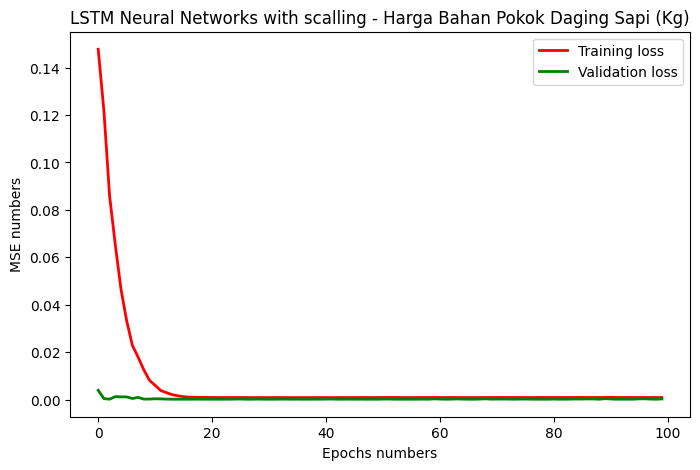

Epoch 1/100
54/54 [==============================] - 4s 26ms/step - loss: 0.3820 - accuracy: 0.9248 - val_loss: 0.1420 - val_accuracy: 0.9522
Epoch 2/100
54/54 [==============================] - 1s 10ms/step - loss: 0.2076 - accuracy: 0.8611 - val_loss: 0.0512 - val_accuracy: 0.9522
Epoch 3/100
54/54 [==============================] - 0s 9ms/step - loss: 0.1783 - accuracy: 0.8565 - val_loss: 0.0426 - val_accuracy: 0.9522
Epoch 4/100
54/54 [==============================] - 0s 9ms/step - loss: 0.1526 - accuracy: 0.8692 - val_loss: 0.0263 - val_accuracy: 0.9522
Epoch 5/100
54/54 [==============================] - 0s 8ms/step - loss: 0.1243 - accuracy: 0.8970 - val_loss: 0.0217 - val_accuracy: 0.9522
Epoch 6/100
54/54 [==============================] - 0s 9ms/step - loss: 0.1056 - accuracy: 0.9086 - val_loss: 0.0161 - val_accuracy: 0.9522
Epoch 7/100
54/54 [==============================] - 0s 8ms/step - loss: 0.0799 - accuracy: 0.9352 - val_loss: 0.0088 - val_accuracy: 0.9522
Epoch 8/100

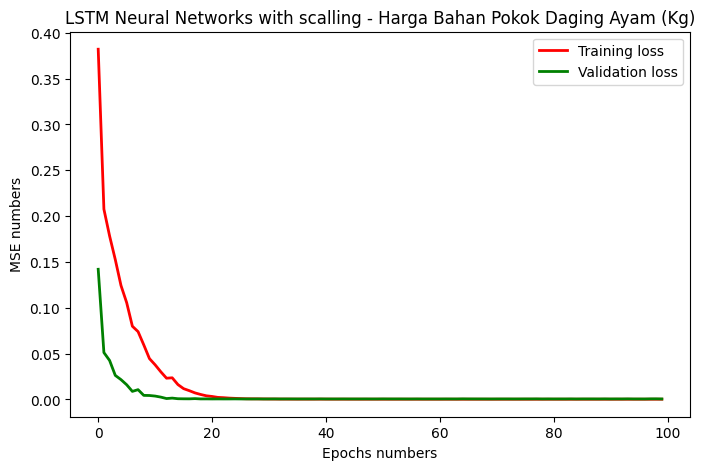

Epoch 1/100
54/54 [==============================] - 3s 18ms/step - loss: 0.2700 - accuracy: 0.8171 - val_loss: 0.0051 - val_accuracy: 0.9522
Epoch 2/100
54/54 [==============================] - 0s 8ms/step - loss: 0.1983 - accuracy: 0.8229 - val_loss: 0.0064 - val_accuracy: 0.9522
Epoch 3/100
54/54 [==============================] - 1s 13ms/step - loss: 0.1740 - accuracy: 0.8646 - val_loss: 0.0021 - val_accuracy: 0.9522
Epoch 4/100
54/54 [==============================] - 1s 11ms/step - loss: 0.1178 - accuracy: 0.9039 - val_loss: 0.0019 - val_accuracy: 0.9522
Epoch 5/100
54/54 [==============================] - 1s 13ms/step - loss: 0.1059 - accuracy: 0.8981 - val_loss: 0.0034 - val_accuracy: 0.9522
Epoch 6/100
54/54 [==============================] - 1s 11ms/step - loss: 0.0837 - accuracy: 0.9086 - val_loss: 3.4115e-04 - val_accuracy: 0.9522
Epoch 7/100
54/54 [==============================] - 1s 11ms/step - loss: 0.0644 - accuracy: 0.9271 - val_loss: 1.6583e-04 - val_accuracy: 0.9522

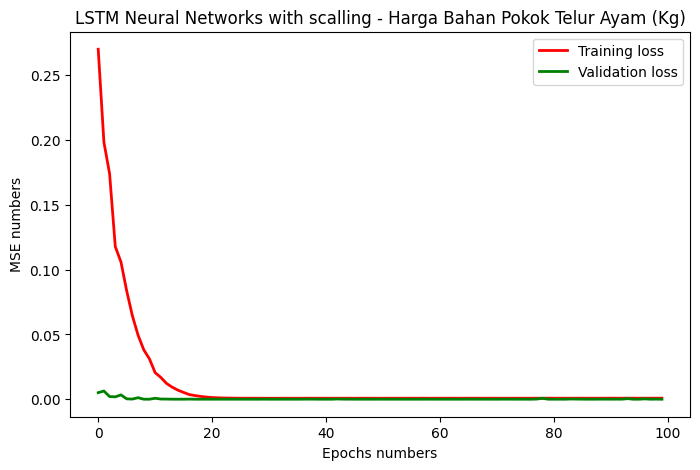

Epoch 1/100
54/54 [==============================] - 4s 21ms/step - loss: 0.3984 - accuracy: 0.4468 - val_loss: 0.1506 - val_accuracy: 0.9522
Epoch 2/100
54/54 [==============================] - 1s 9ms/step - loss: 0.1221 - accuracy: 0.8403 - val_loss: 0.0283 - val_accuracy: 0.9522
Epoch 3/100
54/54 [==============================] - 1s 9ms/step - loss: 0.0937 - accuracy: 0.9028 - val_loss: 0.0120 - val_accuracy: 0.9522
Epoch 4/100
54/54 [==============================] - 1s 9ms/step - loss: 0.0939 - accuracy: 0.9016 - val_loss: 0.0115 - val_accuracy: 0.9522
Epoch 5/100
54/54 [==============================] - 1s 10ms/step - loss: 0.0722 - accuracy: 0.9213 - val_loss: 0.0053 - val_accuracy: 0.9522
Epoch 6/100
54/54 [==============================] - 0s 9ms/step - loss: 0.0662 - accuracy: 0.9248 - val_loss: 0.0045 - val_accuracy: 0.9522
Epoch 7/100
54/54 [==============================] - 1s 11ms/step - loss: 0.0562 - accuracy: 0.9387 - val_loss: 0.0042 - val_accuracy: 0.9522
Epoch 8/10

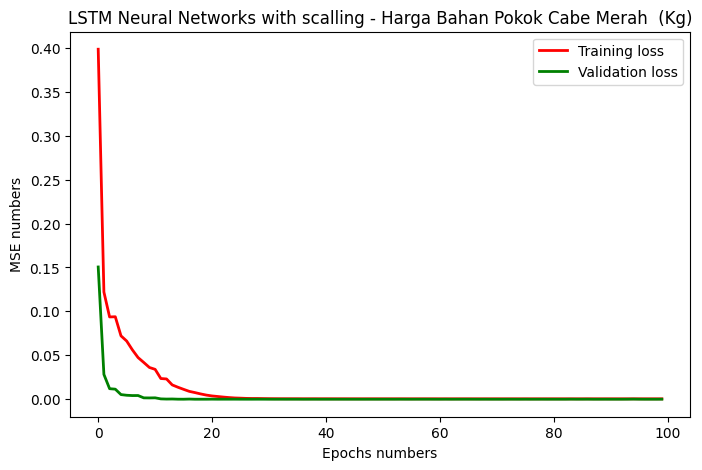

Epoch 1/100
54/54 [==============================] - 3s 20ms/step - loss: 0.1578 - accuracy: 0.8819 - val_loss: 0.1562 - val_accuracy: 0.9522
Epoch 2/100
54/54 [==============================] - 0s 8ms/step - loss: 0.1188 - accuracy: 0.9051 - val_loss: 0.0035 - val_accuracy: 0.9522
Epoch 3/100
54/54 [==============================] - 0s 9ms/step - loss: 0.0698 - accuracy: 0.9074 - val_loss: 7.2579e-04 - val_accuracy: 0.9522
Epoch 4/100
54/54 [==============================] - 0s 8ms/step - loss: 0.0536 - accuracy: 0.9213 - val_loss: 0.0020 - val_accuracy: 0.9522
Epoch 5/100
54/54 [==============================] - 0s 8ms/step - loss: 0.0429 - accuracy: 0.9248 - val_loss: 0.0011 - val_accuracy: 0.9522
Epoch 6/100
54/54 [==============================] - 0s 9ms/step - loss: 0.0357 - accuracy: 0.9259 - val_loss: 4.1067e-04 - val_accuracy: 0.9522
Epoch 7/100
54/54 [==============================] - 0s 8ms/step - loss: 0.0258 - accuracy: 0.9306 - val_loss: 1.9296e-04 - val_accuracy: 0.9522


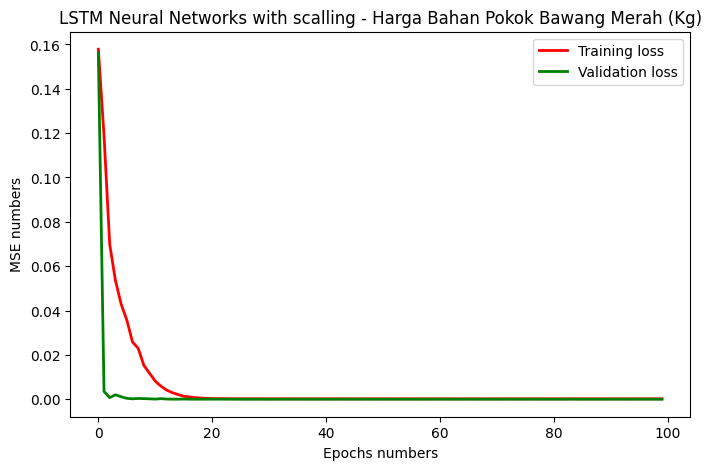

Epoch 1/100
54/54 [==============================] - 3s 18ms/step - loss: 0.1845 - accuracy: 0.7847 - val_loss: 0.0116 - val_accuracy: 0.9522
Epoch 2/100
54/54 [==============================] - 0s 8ms/step - loss: 0.1268 - accuracy: 0.8738 - val_loss: 0.0052 - val_accuracy: 0.9522
Epoch 3/100
54/54 [==============================] - 0s 9ms/step - loss: 0.0991 - accuracy: 0.9016 - val_loss: 0.0047 - val_accuracy: 0.9522
Epoch 4/100
54/54 [==============================] - 0s 8ms/step - loss: 0.0793 - accuracy: 0.9213 - val_loss: 0.0020 - val_accuracy: 0.9522
Epoch 5/100
54/54 [==============================] - 0s 8ms/step - loss: 0.0652 - accuracy: 0.9306 - val_loss: 6.2051e-04 - val_accuracy: 0.9522
Epoch 6/100
54/54 [==============================] - 0s 9ms/step - loss: 0.0483 - accuracy: 0.9421 - val_loss: 4.4146e-04 - val_accuracy: 0.9522
Epoch 7/100
54/54 [==============================] - 0s 9ms/step - loss: 0.0416 - accuracy: 0.9491 - val_loss: 1.5745e-04 - val_accuracy: 0.9522


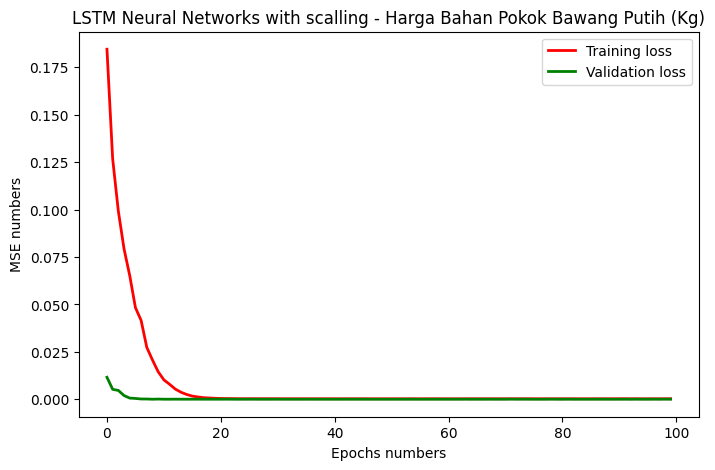

rata-rata MSE tanpa minmax =  nan
rata-rata MSE dengan minmax =  nan
rata-rata MAPE tanpa minmax =  nan
rata-rata MAPE dengan minmax =  nan


,Jenis Bahan Pokok,MSE tanpa minmax,MSE dengan minmax,MAPE tanpa minmax,MAPE dengan minmax


In [ ]:
#run model LSTM
MSE_scaled = []
MAPE_scaled = []
for i in aim:
  train_data, test_data, X_train, X_test, y_train, y_test = prepare_data(
                                                            df_minmax, aim = i, window_len=window_len, zero_base=zero_base, test_size=test_size)

  model = model_lstm(X_train, output_size=1, neurons=lstm_neurons, dropout=dropout, loss=loss, optimizer=optimizer)
  modelfit = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=batch_size, verbose=1, shuffle=True)
  #targets = test_data[i][window_len:]
  preds = model.predict(X_test).squeeze()
  MSE_scaled.append(mean_squared_error(preds, y_test))


  plt.figure(figsize=(8, 5))
  plt.plot(modelfit.history['loss'],'r',linewidth=2, label='Training loss')
  plt.plot(modelfit.history['val_loss'], 'g',linewidth=2, label='Validation loss')
  plt.title('LSTM Neural Networks with scalling - Harga Bahan Pokok {}'.format(i))
  plt.xlabel('Epochs numbers')
  plt.ylabel('MSE numbers')
  plt.legend()
  plt.show()

LSTM = pd.DataFrame(list(zip(aim, MSE, MSE_scaled, MAPE, MAPE_scaled)),columns =['Jenis Bahan Pokok', 'MSE tanpa minmax', 'MSE dengan minmax','MAPE tanpa minmax', 'MAPE dengan minmax'])
print('rata-rata MSE tanpa minmax = ',LSTM['MSE tanpa minmax'].mean())
print('rata-rata MSE dengan minmax = ',LSTM['MSE dengan minmax'].mean())
print('rata-rata MAPE tanpa minmax = ',LSTM['MAPE tanpa minmax'].mean())
print('rata-rata MAPE dengan minmax = ',LSTM['MAPE dengan minmax'].mean())
LSTM